<a href="https://colab.research.google.com/github/MoloZzz/nn/blob/main/Sem5v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Дано набір точок. Необхідно апроксимувати цю залежність поліномом другого ступеня за допомогою нейронної мережі. Розв’язок доповнити графіком із зображенням вихідних точок та кривої, отриманої за допомогою нейронної мережі.

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1251.2611
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 1249.6934
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 1248.1305
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 1246.5726
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 1245.0200
Epoch 6/1000
1/1 [==============================] - 0s 21ms/step - loss: 1243.4727
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 1241.9307
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 1240.3939
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 1238.8625
Epoch 10/1000
1/1 [==============================] - 0s 21ms/step - loss: 1237.3365
Epoch 11/1000
1/1 [==============================] - 0s 15ms/step - loss: 1235.8162
Epoch 12/1000
1/1 [==============================] - 0s 12ms/step - loss: 1234.3014
Epo

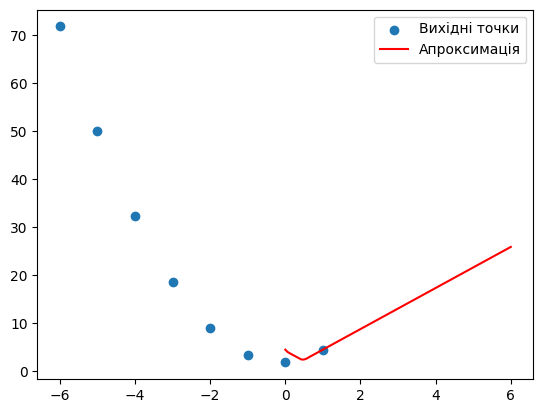

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

x_data = np.array([-6, -5, -4, -3, -2, -1, 0, 1])
y_data = np.array([71.82, 50, 32.24, 18.54, 8.9, 3.32, 1.8, 4.34])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_data, y_data, epochs=1000)

x_test = np.linspace(0, 6, 100)
y_pred = model.predict(x_test)

plt.scatter(x_data, y_data, label='Вихідні точки')
plt.plot(x_test, y_pred, label='Апроксимація', color='red')
plt.legend()
plt.show()

Побудую графік, не точками

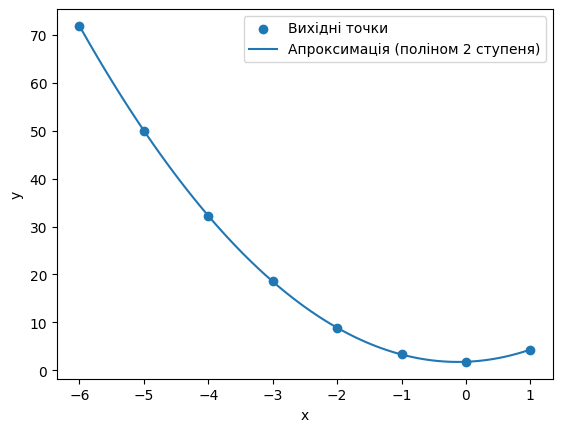

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)


poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x_data)

model = LinearRegression()
model.fit(x_poly, y_data)

x_new = np.linspace(-6, 1, 100).reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_pred = model.predict(x_new_poly)

plt.scatter(x_data, y_data, label='Вихідні точки')
plt.plot(x_new, y_pred, label='Апроксимація (поліном 2 ступеня)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Створіть нейронну мережу, яка правильно класифікує об’єкти, використовуючи дані зтаблиці.

Відповідь мережі: якщо «Параметр 1» = 1, то 1-й клас, якщо «Параметр 2» = «Параметр 3», то 2-й клас, інакше – 3-й клас. Якщо «Параметр 1» != «Параметр 2», то 1-й клас, якщо «Параметр 3» == 0, то 3-й клас, інакше – 2-й клас.

In [7]:
data = np.array([
    [1, 1, 1, 0, 3],
    [1, 0, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 1, 1],
    [0, 0, 0, 1, 2],
    [0, 1, 0, 0, 1],
    [1, 1, 1, 1, 2],
    [0, 0, 0, 0, 3]
])

# Розділення на вхідні дані та мітки (features та labels)
features = data[:, :-1]  # Параметри 1, 2 та 3
labels = data[:, -1]     # Класи
labels = labels.astype(int)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')  # Зміна кількості вихідних класів на 4
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(features, labels, epochs=100, batch_size=1)

predictions = model.predict(features)

predicted_classes = np.argmax(predictions, axis=1)

print("Порівняння передбачених класів та реальних класів:")
for i in range(len(labels)):
    print(f"Об'єкт {i+1}: Передбачено - Клас {predicted_classes[i]}, Реальний - Клас {int(labels[i])}")

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 1.3373 - accuracy: 0.4444
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1.3234 - accuracy: 0.4444
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1.3100 - accuracy: 0.4444
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2972 - accuracy: 0.4444
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2840 - accuracy: 0.4444
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2709 - accuracy: 0.4444
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2589 - accuracy: 0.4444
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4444
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2334 - accuracy: 0.4444
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2180 - accuracy: 0.4444
Epoch 11/100
9/9 [===========